# Landsat 7 - Grey Glacier

Exploratory analysis

## Package Imports

In [1]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)

In [2]:
import datacube
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *

from odc.ui import DcViewer
from datacube.utils import masking
from datacube.utils.rio import configure_s3_access

configure_s3_access(aws_unsigned=False, requester_pays=True, client=client)

## Grey Glacier Satellital Data

In [3]:
dc = datacube.Datacube(app='landsat-glacier') 


In [4]:
dc.list_products()


name  \
name                                                   
asf_s1_grd_gamma0                  asf_s1_grd_gamma0   
asf_s1_rtc_grd_hd                  asf_s1_rtc_grd_hd   
copernicus_dem_30                  copernicus_dem_30   
copernicus_dem_90                  copernicus_dem_90   
cr2met                                        cr2met   
fasat_charlie_ms                    fasat_charlie_ms   
landcover_chile_2014            landcover_chile_2014   
landsat5_c2l2_sr                    landsat5_c2l2_sr   
landsat5_c2l2_st                    landsat5_c2l2_st   
landsat5_geomedian_annual  landsat5_geomedian_annual   
landsat7_c2l2_sr                    landsat7_c2l2_sr   
landsat7_c2l2_st                    landsat7_c2l2_st   
landsat7_geomedian_annual  landsat7_geomedian_annual   
landsat8_c2l2_sr                    landsat8_c2l2_sr   
landsat8_c2l2_st                    landsat8_c2l2_st   
landsat8_geomedian_annual  landsat8_geomedian_annual   
landsat9_c2l2_sr                    landsat9_c2l2_sr   
landsat9_c2l2_st                    landsat9_c2l2_st   
lpdaac_nasadem                        lpdaac_nasadem   
nasa_aqua_l2_oc                      nasa_aqua_l2_oc   
s2_geomedian_annual              s2_geomedian_annual   
s2_geomedian_seasonal          s2_geomedian_seasonal   
s2_l2a                                        s2_l2a   
s3_ol_1_efr                              s3_ol_1_efr   
s3_ol_2_wfr                              s3_ol_2_wfr   
s3_ol_2_wfr_nrt                      s3_ol_2_wfr_nrt   
s3_ol_2_wfr_ntc                      s3_ol_2_wfr_ntc   
samsara                                      samsara   
samsara_new                              samsara_new   
samsara_summary                      samsara_summary   
sentinel1_grd_gamma0            sentinel1_grd_gamma0   
srtm                                            srtm   
ultracam_saf                            ultracam_saf   

                                                                 description  \
name                                                                           
asf_s1_grd_gamma0               Sentinel 1 Radiometrically Terrain Corrected   
asf_s1_rtc_grd_hd               Sentinel 1 Radiometrically Terrain Corrected   
copernicus_dem_30            Copernicus 30m Digital Elevation Model (GLO-30)   
copernicus_dem_90            Copernicus 90m Digital Elevation Model (GLO-90)   
cr2met                     CR2MET, a high-resolution precipitation and te...   
fasat_charlie_ms           FASat Charlie TOA multi-spectral data (Sistema...   
landcover_chile_2014                                Land Cover de Chile 2014   
landsat5_c2l2_sr           Landsat 5 Collection 2 Level-2 Surface Reflect...   
landsat5_c2l2_st           Landsat 5 Collection 2 Level-2 UTM Surface Tem...   
landsat5_geomedian_annual  Surface Reflectance Annual Geometric Median an...   
landsat7_c2l2_sr           Landsat 7 Collection 2 Level-2 Surface Reflect...   
landsat7_c2l2_st           Landsat 7 Collection 2 Level-2 UTM Surface Tem...   
landsat7_geomedian_annual  Surface Reflectance Annual Geometric Median an...   
landsat8_c2l2_sr           Landsat 8 Collection 2 Level-2 Surface Reflect...   
landsat8_c2l2_st           Landsat 8 Collection 2 Level-2 UTM Surface Tem...   
landsat8_geomedian_annual  Surface Reflectance Annual Geometric Median an...   
landsat9_c2l2_sr           Landsat 9 Collection 2 Level-2 Surface Reflect...   
landsat9_c2l2_st           Landsat 9 Collection 2 Level-2 UTM Surface Tem...   
lpdaac_nasadem                   NASADEM Merged DEM Global 1 arc second V001   
nasa_aqua_l2_oc            NASA MODIS-Aqua L2 Ocean Color, regridded to W...   
s2_geomedian_annual        Surface Reflectance Annual Geometric Median an...   
s2_geomedian_seasonal      Surface Reflectance Seasonal Geometric Median ...   
s2_l2a                     Sentinel-2a and Sentinel-2b imagery, processed...   
s3_ol_1_efr                Sentinel-3 OLCI EFR - Ocean and Land Color Ins...   
s3_ol_2

In [5]:
products = ['landsat7_c2l2_sr', 'landsat7_c2l2_st', 'landsat7_geomedian_annual', 'landsat8_c2l2_sr', 'landsat9_c2l2_sr', 'srtm']
dc.list_measurements().loc[products]

name    dtype         units  \
product                   measurement                                           
landsat7_c2l2_sr          blue                    blue   uint16   reflectance   
                          green                  green   uint16   reflectance   
                          red                      red   uint16   reflectance   
                          nir08                  nir08   uint16   reflectance   
                          swir16                swir16   uint16   reflectance   
                          swir22                swir22   uint16   reflectance   
                          atmos_opacity  atmos_opacity    int16             1   
                          qa_pixel            qa_pixel   uint16     bit_index   
                          qa_radsat          qa_radsat   uint16     bit_index   
                          cloud_qa            cloud_qa    uint8     bit_index   
landsat7_c2l2_st          lwir                    lwir   uint16        Kelvin   
                          TRAD                    TRAD    int16  W/(m2.sr.μm)   
                          URAD                    URAD    int16  W/(m2.sr.μm)   
                          DRAD                    DRAD    int16  W/(m2.sr.μm)   
                          ATRAN                  ATRAN    int16             1   
                          EMIS                    EMIS    int16             1   
                          EMSD                    EMSD    int16             1   
                          CDIST                  CDIST    int16    Kilometers   
                          qa_pixel            qa_pixel   uint16     bit_index   
                          qa_radsat          qa_radsat   uint16     bit_index   
                          qa                        qa    int16        Kelvin   
landsat7_geomedian_annual blue                    blue   uint16             1   
                          green                  green   uint16             1   
                          red                      red   uint16             1   
                          nir08                  nir08   uint16             1   
                          swir16                swir16   uint16             1   
                          swir22                swir22   uint16             1   
                          bcmad                  bcmad  float32             1   
                          smad                    smad  float32             1   
                          emad                    emad  float32             1   
                          count                  count   uint16             1   
landsat8_c2l2_sr          coastal              coastal   uint16   reflectance   
                          blue                    blue   uint16   reflectance   
                          green                  green   uint16   reflectance   
                          red                      red   uint16   reflectance   
                          nir08                  nir08   uint16   reflectance   
                          swir16                swir16   uint16   reflectance   
                          swir22                swir22   uint16   reflectance   
                          qa_pixel            qa_pixel   uint16     bit_index   
                          qa_aerosol        qa_aerosol    uint8     bit_index   
                          qa_radsat          qa_radsat   uint16     bit_index   
landsat9_c2l2_sr          coastal              coastal   uint16   reflectance   
                          blue                    blue   uint16   reflectance   
                          green                  green   uint16   reflectance   
                          red                      red   uint16   reflectance   
                          nir08                  nir08   uint16   reflectance   
                          swir16                swir16   uint16   reflectance   
                          swir22                swir22   uint16   reflectance   


Necesitamos:

Checklist para landsat7_c2l2_sr

- LE7 B1 (blue) (check)
- LE7 B2 (green) (check)
- LE7 B3 (red) (check)
- LE7 B4 (near infrared) (check)
- LE7 B5 (shortwave infrared 1) (check)
- LE7 B6_VCID_1 (low-gain thermal infrared) *(NOT CHECK)* los tiene landsat7_c2l2_st
- LE7 B6_VCID_2 (high-gain thermal infrared)    *(NOT CHECK)* los tiene landsat7_c2l2_st
- LE7 B7 (shortwave infrared 2)  (check)
- LE7 B8 (panchromatic)  *(NOT CHECK)*
- LE7 BQA (quality bitmask) (Como lo us KHK?)
- NDVI (vegetation index) (calculable)
- NDSI (snow index) (calculable)
- NDWI (water index) (calculable)
- SRTM 90 elevation (no)
- SRTM 90 slope (Es la tasa de cambio de la elevación así que debiesemos poder calcularla con $\nabla z(x,y)$)

In [6]:
xmin:  -73.35676489704194
ymin:  -51.274579580124886
xmax:  -72.80813635761145
ymax:  -50.839518983207824

In [7]:
query7 = {
    "product": "landsat7_c2l2_sr",
    "y": (-51.274579580124886, -50.839518983207824), 
    "x": (-73.35676489704194, -72.80813635761145),
    #"time": ("2020-01-01", "2020-12-31"),
    "output_crs": "EPSG:32719",
    "resolution": (-30, 30),
    "dask_chunks": {"time": 1, 'x':2048, 'y':2048},
    "group_by": "solar_day"
}

query7st = {
    "product": "landsat7_c2l2_st",
    "y": (-51.274579580124886, -50.839518983207824), 
    "x": (-73.35676489704194, -72.80813635761145),
    #"time": ("2020-01-01", "2020-12-31"),
    "output_crs": "EPSG:32719",
    "resolution": (-30, 30),
    "dask_chunks": {"time": 1, 'x':2048, 'y':2048},
    "group_by": "solar_day"
}


query8 = {
    "product": "landsat8_c2l2_sr",
    "y": (-51.274579580124886, -50.839518983207824), 
    "x": (-73.35676489704194, -72.80813635761145),
    #"time": ("2020-01-01", "2020-12-31"),
    "output_crs": "EPSG:32719",
    "resolution": (-30, 30),
    "dask_chunks": {"time": 1, 'x':2048, 'y':2048},
    "group_by": "solar_day"
}

query9 = {
    "product": "landsat9_c2l2_sr",
    "y": (-51.274579580124886, -50.839518983207824), 
    "x": (-73.35676489704194, -72.80813635761145),
    #"time": ("2020-01-01", "2020-12-31"),
    "output_crs": "EPSG:32719",
    "resolution": (-3, 3),
    "dask_chunks": {"time": 1, 'x':2048, 'y':2048},
    "group_by": "solar_day"
}


querySRTM = {
    "product": "srtm",
    "y": (-51.274579580124886, -50.839518983207824), 
    "x": (-73.35676489704194, -72.80813635761145),
    #"time": ("2020-01-01", "2020-12-31"),
    "output_crs": "EPSG:32719",
    "resolution": (-30, 30),
    "dask_chunks": {"time": 1, 'x':2048, 'y':2048},
    "group_by": "solar_day"
}


querySAF = {
    "product": "ultracam_saf",
    "y": (-51.274579580124886, -50.839518983207824), 
    "x": (-73.35676489704194, -72.80813635761145),
    #"time": ("2020-01-01", "2020-12-31"),
    "output_crs": "EPSG:32719",
    "resolution": (-30, 30),
    "dask_chunks": {"time": 1, 'x':2048, 'y':2048},
    "group_by": "solar_day"
}

### Landsat 8 Data

For landsat 7 sr first

In [9]:
query = query8
ds = dc.load(**query)

In [10]:
from dea_tools.plotting import display_map, rgb

display_map(x = query['x'], y = query['y'])

In [11]:
ds

<xarray.Dataset>
Dimensions:      (time: 369, y: 1684, x: 1371)
Coordinates:
  * time         (time) datetime64[ns] 2013-03-30T14:18:47.272840 ... 2024-03...
  * y            (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x            (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref  int32 32719
Data variables:
    coastal      (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    nir08        (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    swir16       (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    swir22       (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_pixel     (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_aerosol   (time, y, x) uint8 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_radsat    (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

#### *Nota: Tenemos 719 tiempos para landsat 7 en total*

In [12]:
ds.time

<xarray.DataArray 'time' (time: 369)>
array(['2013-03-30T14:18:47.272840000', '2013-04-14T14:27:55.804034000',
       '2013-04-23T14:21:42.088233000', ..., '2024-02-24T14:26:08.711400000',
       '2024-03-04T14:19:50.227152000', '2024-03-20T14:19:41.082698000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2013-03-30T14:18:47.272840 ... 2024-03...
    spatial_ref  int32 32719
Attributes:
    units:    seconds since 1970-01-01 00:00:00

#### Mascaras Nieve y nubes

In [13]:
from datacube.utils import masking

In [14]:
# Radiometric saturation quality assessment
display(masking.describe_variable_flags(ds.qa_radsat))

bits  \
qa_radsat          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]   
b1_saturation                                           0   
b2_saturation                                           1   
b3_saturation                                           2   
b4_saturation                                           3   
b5_saturation                                           4   
b6_saturation                                           5   
b7_saturation                                           6   
b9_saturation                                           8   
terrain_occlusion                                      11   

                                                              values  \
qa_radsat          {'1': 'Band 1 Data Saturation', '2': 'Band 2 D...   
b1_saturation          {'0': 'no_saturation', '1': 'saturated_data'}   
b2_saturation          {'0': 'no_saturation', '1': 'saturated_data'}   
b3_saturation          {'0': 'no_saturation', '1': 'saturated_data'}   
b4_saturation          {'0': 'no_saturation', '1': 'saturated_data'}   
b5_saturation          {'0': 'no_saturation', '1': 'saturated_data'}   
b6_saturation          {'0': 'no_saturation', '1': 'saturated_data'}   
b7_saturation          {'0': 'no_saturation', '1': 'saturated_data'}   
b9_saturation          {'0': 'no_saturation', '1': 'saturated_data'}   
terrain_occlusion  {'0': 'no_terrain_occlusion', '1': 'terrain_oc...   

                              description  
qa_radsat          Radiometric saturation  
b1_saturation                         NaN  
b2_saturation                         NaN  
b3_saturation                         NaN  
b4_saturation                         NaN  
b5_saturation                         NaN  
b6_saturation                         NaN  
b7_saturation                         NaN  
b9_saturation                         NaN  
terrain_occlusion                     NaN

In [15]:
masking.describe_variable_flags(ds.qa_radsat)["values"]["qa_radsat"]

{'1': 'Band 1 Data Saturation',
 '2': 'Band 2 Data Saturation',
 '4': 'Band 3 Data Saturation',
 '8': 'Band 4 Data Saturation',
 '16': 'Band 5 Data Saturation',
 '32': 'Band 6 Data Saturation',
 '64': 'Band 7 Data Saturation',
 '128': 'Unused',
 '256': 'Band 9 Data Saturation',
 '512': 'Unused',
 '1024': 'Unused',
 '2048': 'Terrain occlusion'}

In [16]:
relevant_qa_radsat = ["b1_saturation", 'b2_saturation', 'b3_saturation', 'b4_saturation', 'b5_saturation', 'b7_saturation']
for key in relevant_qa_radsat:
    print(f'{key}: {masking.describe_variable_flags(ds.qa_radsat)["values"][key]}')

b1_saturation: {'0': 'no_saturation', '1': 'saturated_data'}
b2_saturation: {'0': 'no_saturation', '1': 'saturated_data'}
b3_saturation: {'0': 'no_saturation', '1': 'saturated_data'}
b4_saturation: {'0': 'no_saturation', '1': 'saturated_data'}
b5_saturation: {'0': 'no_saturation', '1': 'saturated_data'}
b7_saturation: {'0': 'no_saturation', '1': 'saturated_data'}


In [17]:
# for landsat 7 sr
good_radsat_flags = {
    "b1_saturation": 'saturated_data',
    'b2_saturation': 'saturated_data',
    'b3_saturation': 'saturated_data', 
}

quality_band = 'qa_radsat'
saturation_mask = masking.make_mask(ds[quality_band], **good_radsat_flags)

In [18]:
# Pixel Quality assesment 
masking.describe_variable_flags(ds.qa_pixel)

bits  \
snow                                                                     5   
clear                                                                    6   
cloud                                                                    3   
water                                                                    7   
cirrus                                                                   2   
nodata                                                                   0   
qa_pixel                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
cloud_shadow                                                             4   
dilated_cloud                                                            1   
cloud_confidence                                                    [8, 9]   
cirrus_confidence                                                 [14, 15]   
snow_ice_confidence                                               [12, 13]   
cloud_shadow_confidence                                           [10, 11]   

                                                                    values  \
snow                     {'0': 'not_high_confidence', '1': 'high_confid...   
clear                                     {'0': 'not_clear', '1': 'clear'}   
cloud                    {'0': 'not_high_confidence', '1': 'high_confid...   
water                                 {'0': 'land_or_cloud', '1': 'water'}   
cirrus                   {'0': 'not_high_confidence', '1': 'high_confid...   
nodata                                             {'0': False, '1': True}   
qa_pixel                 {'1': 'Fill', '2': 'Dilated Cloud', '4': 'Cirr...   
cloud_shadow             {'0': 'not_high_confidence', '1': 'high_confid...   
dilated_cloud                         {'0': 'not_dilated', '1': 'dilated'}   
cloud_confidence         {'0': 'none', '1': 'low', '2': 'medium', '3': ...   
cirrus_confidence        {'0': 'none', '1': 'low', '2': 'reserved', '3'...   
snow_ice_confidence      {'0': 'none', '1': 'low', '2': 'reserved', '3'...   
cloud_shadow_confidence  {'0': 'none', '1': 'low', '2': 'reserved', '3'...   

                                   description  
snow                                       NaN  
clear                                      NaN  
cloud                                      NaN  
water                                      NaN  
cirrus                                     NaN  
nodata                                     NaN  
qa_pixel                 Level 2 pixel quality  
cloud_shadow                               NaN  
dilated_cloud                              NaN  
cloud_confidence                           NaN  
cirrus_confidence                          NaN  
snow_ice_confidence                        NaN  
cloud_shadow_confidence                    NaN

In [19]:
masking.describe_variable_flags(ds.qa_pixel)["values"]["qa_pixel"]

{'1': 'Fill',
 '2': 'Dilated Cloud',
 '4': 'Cirrus',
 '8': 'Cloud',
 '16': 'Cloud Shadow',
 '32': 'Snow',
 '64': 'Clear',
 '128': 'Water',
 '256': 'Cloud Confidence low bit',
 '512': 'Cloud Confidence high bit',
 '1024': 'Cloud Shadow Confidence low bit',
 '2048': 'Cloud Shadow Confidence high bit',
 '4096': 'Snow Ice Confidence low bit',
 '8192': 'Snow Ice Confidence high bit',
 '16384': 'Cirrus Confidence low bit',
 '32768': 'Cirrus Confidence high bit'}

In [20]:
relevant_qa_pixels = ["snow_ice_confidence", 'cloud_shadow', 'clear', 'water', 'cloud']
for key in relevant_qa_pixels:
    print(f'{key}: {masking.describe_variable_flags(ds.qa_pixel)["values"][key]}')

snow_ice_confidence: {'0': 'none', '1': 'low', '2': 'reserved', '3': 'high'}
cloud_shadow: {'0': 'not_high_confidence', '1': 'high_confidence'}
clear: {'0': 'not_clear', '1': 'clear'}
water: {'0': 'land_or_cloud', '1': 'water'}
cloud: {'0': 'not_high_confidence', '1': 'high_confidence'}


In [21]:
# for landsat 7 sr
good_snow_pixel_flags = {
    "snow_ice_confidence": "high",
    "nodata": False,
}

good_cloud_pixel_flags = {
    "cloud": "not_high_confidence",
    "cloud_shadow": "not_high_confidence",
}

usable_pixel_flags = {
    "nodata": True,
}

In [22]:
quality_band = 'qa_pixel'
cloud_free_mask = masking.make_mask(ds[quality_band], **good_cloud_pixel_flags)

valid_pixel_proportion = cloud_free_mask.sum(dim=("x", "y"))/(cloud_free_mask.shape[1] * cloud_free_mask.shape[2])
valid_threshold = 0.8

observations_to_keep = (valid_pixel_proportion >= valid_threshold)

ds_keep = ds.sel(time=observations_to_keep).persist()
ds_keep

<xarray.Dataset>
Dimensions:      (time: 41, y: 1684, x: 1371)
Coordinates:
  * time         (time) datetime64[ns] 2013-03-30T14:18:47.272840 ... 2024-03...
  * y            (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x            (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref  int32 32719
Data variables:
    coastal      (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    nir08        (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    swir16       (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    swir22       (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_pixel     (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_aerosol   (time, y, x) uint8 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_radsat    (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

In [23]:
#Non usable times: 
# 0, 8, 24, 25(esta es un quizas)
# 33
index_array = xr.DataArray([i for i in range(41) if i not in [0, 8, 24, 25, 33]], dims="time")

ds_keep = ds_keep.isel(time=index_array)

In [24]:
snow_mask = masking.make_mask(ds_keep[quality_band], **good_snow_pixel_flags)
# filtro de saturación no parece servir mucho la verdad
dsf = ds_keep#.where(snow_mask & cloud_free_mask)#& saturation_mask)

time = np.random.choice(dsf.time)
print(f'Randomly Chosen date: {time}')

Randomly Chosen date: 2015-01-23T14:19:52.192663000


In [25]:
dsf.update({'NDVI': (dsf['nir08'] - dsf['red']) / (dsf['nir08'] + dsf['red']),
            'NDWI': (dsf['nir08'] - dsf['swir16']) / (dsf['nir08'] + dsf['swir16']),
            #(G – SWIR1) / (G + SWIR1)
            'NDSI': (dsf['green'] - dsf['swir16']) / (dsf['green'] + dsf['swir16']),
           })

<xarray.Dataset>
Dimensions:      (time: 36, y: 1684, x: 1371)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-23T14:19:52.192663 ... 2024-03...
  * y            (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x            (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref  int32 32719
Data variables: (12/13)
    coastal      (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    nir08        (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    swir16       (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    ...           ...
    qa_pixel     (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_aerosol   (time, y, x) uint8 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_radsat    (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    NDVI         (time, y, x) float64 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    NDWI         (time, y, x) float64 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    NDSI         (time, y, x) float64 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

In [26]:
dsf

<xarray.Dataset>
Dimensions:      (time: 36, y: 1684, x: 1371)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-23T14:19:52.192663 ... 2024-03...
  * y            (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x            (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref  int32 32719
Data variables: (12/13)
    coastal      (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    nir08        (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    swir16       (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    ...           ...
    qa_pixel     (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_aerosol   (time, y, x) uint8 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_radsat    (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    NDVI         (time, y, x) float64 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    NDWI         (time, y, x) float64 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    NDSI         (time, y, x) float64 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

In [27]:
# Interactive plotter for all snow masks
# The fisrt date is always randomly chosen
interact(lambda time_step: snow_mask.isel(time=time_step).plot.imshow(figsize=(12, 8)), time_step=(0, len(dsf.time)-1))

interactive(children=(IntSlider(value=17, description='time_step', max=35), Output()), _dom_classes=('widget-i…

<function __main__.<lambda>(time_step)>

In [28]:
# landsat 7 sr
bands = ["red", "green", "blue"]
interactive_plot_reflective_band = interact(lambda time_step, band: dsf[band].isel(time=time_step).plot.imshow(robust=True, figsize=(12, 8)), time_step=(0, len(dsf.time)-1), band=bands)

interactive(children=(IntSlider(value=17, description='time_step', max=35), Dropdown(description='band', optio…

In [29]:
#Non usable times: 
# 0, 8, 24, 25(esta es un quizas)
# 33

In [30]:
interactive_plot_reflective_band = interact(lambda time_step: dsf[bands].isel(time=time_step).to_array().plot.imshow(robust=True, figsize=(12, 8)), time_step=(0, len(dsf.time)-1))

interactive(children=(IntSlider(value=17, description='time_step', max=35), Output()), _dom_classes=('widget-i…

In [31]:
dsf['NDSI'] = dsf['NDSI'].where(dsf['NDSI'] >= -1).where(dsf['NDSI'] <= 1).compute()
dsf['NDWI'] = dsf['NDWI'].where(dsf['NDWI'] >= -1).where(dsf['NDWI'] <= 1).compute()
dsf['NDVI'] = dsf['NDVI'].where(dsf['NDVI'] >= -1).where(dsf['NDVI'] <= 1).compute()

/env/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/env/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/env/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/env/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/env/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/env/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/env/lib/python3.10/site-packages/

In [32]:
data = ['NDSI', 'NDWI', 'NDVI']
interact(lambda time_step, i: dsf[i].isel(time=time_step).plot.imshow(robust=True, figsize=(12, 8)), time_step=(0, len(dsf.time)-1), i=data)

interactive(children=(IntSlider(value=17, description='time_step', max=35), Dropdown(description='i', options=…

<function __main__.<lambda>(time_step, i)>

In [32]:
'''
# se me ocurre que una medida de calidad de imagen, para filtrar, es el % de snow high en si.

# EDIT: (nah, no tiene mucho sentido, estaria perdiendo los veranos).
valid_pixel_proportion = snow_mask1.sum(dim=("x", "y"))/(snow_mask1.shape[1] * snow_mask1.shape[2])
valid_threshold = 0.2
observations_to_keep = (valid_pixel_proportion >= valid_threshold)
ds_keep = dsf.sel(time=observations_to_keep)
ds_keep[["red", "green", "blue"]].isel(time=40).to_array().plot.imshow(robust=True, figsize=(10, 10))
'''

'\n# se me ocurre que una medida de calidad de imagen, para filtrar, es el % de snow high en si.\n\n# EDIT: (nah, no tiene mucho sentido, estaria perdiendo los veranos).\nvalid_pixel_proportion = snow_mask1.sum(dim=("x", "y"))/(snow_mask1.shape[1] * snow_mask1.shape[2])\nvalid_threshold = 0.2\nobservations_to_keep = (valid_pixel_proportion >= valid_threshold)\nds_keep = dsf.sel(time=observations_to_keep)\nds_keep[["red", "green", "blue"]].isel(time=40).to_array().plot.imshow(robust=True, figsize=(10, 10))\n'

In [33]:
img = dsf.isel(time=0)
img

<xarray.Dataset>
Dimensions:      (y: 1684, x: 1371)
Coordinates:
    time         datetime64[ns] 2015-01-23T14:19:52.192663
  * y            (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x            (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref  int32 32719
Data variables: (12/13)
    coastal      (y, x) uint16 dask.array<chunksize=(1684, 1371), meta=np.ndarray>
    blue         (y, x) uint16 dask.array<chunksize=(1684, 1371), meta=np.ndarray>
    green        (y, x) uint16 dask.array<chunksize=(1684, 1371), meta=np.ndarray>
    red          (y, x) uint16 dask.array<chunksize=(1684, 1371), meta=np.ndarray>
    nir08        (y, x) uint16 dask.array<chunksize=(1684, 1371), meta=np.ndarray>
    swir16       (y, x) uint16 dask.array<chunksize=(1684, 1371), meta=np.ndarray>
    ...           ...
    qa_pixel     (y, x) uint16 dask.array<chunksize=(1684, 1371), meta=np.ndarray>
    qa_aerosol   (y, x) uint8 dask.array<chunksize=(1684, 1371), meta=np.ndarray>
    qa_radsat    (y, x) uint16 dask.array<chunksize=(1684, 1371), meta=np.ndarray>
    NDVI         (y, x) float64 nan nan nan nan ... 0.4536 0.4457 0.4131 0.3933
    NDWI         (y, x) float64 0.6705 0.6588 0.6652 ... 0.2804 0.2683 0.2566
    NDSI         (y, x) float64 0.7564 0.7493 0.7472 0.7206 ... nan nan nan nan
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

In [ ]:
from xrpatcher import XRDAPatcher
import collections

data_vars = ["coastal", "blue", "green", "red", "nir08", "swir16", "swir22", "NDVI", "NDWI", "NDSI"]
TrainingItem = collections.namedtuple("TrainingItem", ("coastal", "blue", "green", "red", "nir08", "swir16", "swir22", "NDVI", "NDWI", "NDSI"))

In [ ]:
patches = {"x": 512, "y": 512}
strides = {"x": 1, "y": 1}
domain_limits = None#{"lat": slice(-10, 10)}
check_full_scan = True

xrda_batches = XRDAPatcher(
    da=img[data_vars].to_array(),
    patches=patches,
    strides=strides,
    check_full_scan=check_full_scan
)

print(xrda_batches)
print(f"Dataset(size): {len(xrda_batches)}")

In [ ]:
import torch


class XrTorchDataset(torch.utils.data.Dataset):
    def __init__(self, batcher: XRDAPatcher, item_postpro=None):
        self.batcher = batcher
        self.postpro = item_postpro

    def __getitem__(self, idx):
        item = self.batcher[idx].load().values
        if self.postpro:
            item = self.postpro(item)
        return item

    def reconstruct_from_batches(self, batches, **rec_kws):
        return self.batcher.reconstruct([*itertools.chain(*batches)], **rec_kws)

    def __len__(self):
        return len(self.batcher)

In [39]:
torch_ds = XrTorchDataset(xrda_batches, item_postpro=TrainingItem._make)
dataloader = torch.utils.data.DataLoader(torch_ds, batch_size=4, shuffle=False)

In [40]:
#img[data_vars[:2]].to_array().plot(row="variable", figsize=(5, 5))
items = [torch_ds[i] for i in range(100)]

/env/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 52.85 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


Patches of u


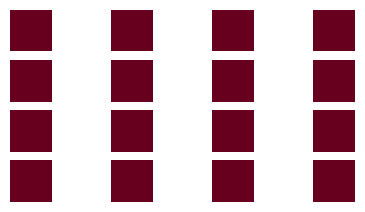



Patches of v


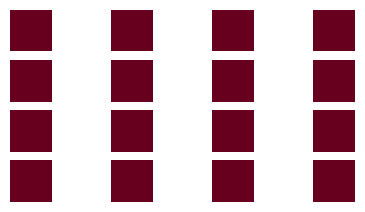

In [42]:
import itertools


def plot_patches(items_to_plot, nbaxes=(4, 4)):
    fig, axs = plt.subplots(*nbaxes, figsize=(5, 2.5))

    for item, ax in zip(items_to_plot, [*itertools.chain(*reversed(axs))]):
        ax.imshow(item, cmap="RdBu_r", vmax=70, vmin=-70, origin="lower")
        ax.set_xticks([], labels=None)
        ax.set_axis_off()
        ax.set_yticks([], labels=None)


print("Patches of u")
plot_patches([i.red for i in items])
plt.show()

print("\n\nPatches of v")
plot_patches([i.blue for i in items])

In [35]:
from datacube.utils.cog import write_cog
from tqdm.auto import tqdm


run = True
if run:
    for i in tqdm(range(len(dsf.time))):
        img = dsf.isel(time=i).to_array()
        date = dsf.time[i].dt.strftime("%Y%m%d").values
        write_cog(img, fname=f'landsat_8_{date}.tif', overwrite=True).compute()

  0%|          | 0/36 [00:00<?, ?it/s]

/env/lib/python3.10/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 52.85 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/env/lib/python3.10/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 52.85 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/env/lib/python3.10/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 52.85 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/env/lib/python3.10/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 52.85 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/env/lib/python3.10/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 52.85 MiB.
This may c

#### Para landsat 7

In [29]:
query = query7st
ds = dc.load(**query)
ds

<xarray.Dataset>
Dimensions:      (time: 719, y: 1684, x: 1371)
Coordinates:
  * time         (time) datetime64[ns] 1999-08-15T14:12:47.400865 ... 2023-03...
  * y            (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x            (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref  int32 32719
Data variables:
    lwir         (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    TRAD         (time, y, x) int16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    URAD         (time, y, x) int16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    DRAD         (time, y, x) int16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    ATRAN        (time, y, x) int16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    EMIS         (time, y, x) int16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    EMSD         (time, y, x) int16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    CDIST        (time, y, x) int16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_pixel     (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_radsat    (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa           (time, y, x) int16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

In [30]:
masking.describe_variable_flags(ds.qa_pixel)

bits  \
snow                                                                     5   
clear                                                                    6   
cloud                                                                    3   
water                                                                    7   
cirrus                                                                   2   
nodata                                                                   0   
qa_pixel                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
cloud_shadow                                                             4   
dilated_cloud                                                            1   
cloud_confidence                                                    [8, 9]   
cirrus_confidence                                                 [14, 15]   
snow_ice_confidence                                               [12, 13]   
cloud_shadow_confidence                                           [10, 11]   

                                                                    values  \
snow                     {'0': 'not_high_confidence', '1': 'high_confid...   
clear                                     {'0': 'not_clear', '1': 'clear'}   
cloud                    {'0': 'not_high_confidence', '1': 'high_confid...   
water                                 {'0': 'land_or_cloud', '1': 'water'}   
cirrus                   {'0': 'not_high_confidence', '1': 'high_confid...   
nodata                                             {'0': False, '1': True}   
qa_pixel                 {'1': 'Fill', '2': 'Dilated Cloud', '4': 'Cirr...   
cloud_shadow             {'0': 'not_high_confidence', '1': 'high_confid...   
dilated_cloud                         {'0': 'not_dilated', '1': 'dilated'}   
cloud_confidence         {'0': 'none', '1': 'low', '2': 'medium', '3': ...   
cirrus_confidence        {'0': 'none', '1': 'low', '2': 'reserved', '3'...   
snow_ice_confidence      {'0': 'none', '1': 'low', '2': 'reserved', '3'...   
cloud_shadow_confidence  {'0': 'none', '1': 'low', '2': 'reserved', '3'...   

                                   description  
snow                                       NaN  
clear                                      NaN  
cloud                                      NaN  
water                                      NaN  
cirrus                                     NaN  
nodata                                     NaN  
qa_pixel                 Level 2 pixel quality  
cloud_shadow                               NaN  
dilated_cloud                              NaN  
cloud_confidence                           NaN  
cirrus_confidence                          NaN  
snow_ice_confidence                        NaN  
cloud_shadow_confidence                    NaN

In [31]:
# for landsat 7 st
good_pixel_flags = {
    #"cloud": "not_high_confidence",
    #"snow": "not_high_confidence",
    "snow_ice_confidence": "high",
    "cloud": "not_high_confidence",
    "cirrus": "not_high_confidence",
    "cloud_shadow": "not_high_confidence",
    "nodata": False,
    #'snow_ice_confidence': 'low'
}

quality_band = 'qa_pixel'
snow_mask_st = masking.make_mask(ds[quality_band], **good_pixel_flags)
# para landsat7_st
dsf = ds[["lwir", "TRAD", "URAD", "DRAD"]]#.where(snow_mask_st)

In [32]:
interactive_plot = interact(lambda time_step: snow_mask_st.isel(time=time_step).plot.imshow(figsize=(12, 8)), time_step=(0, len(dsf.time)-1))

interactive(children=(IntSlider(value=359, description='time_step', max=718), Output()), _dom_classes=('widget…

In [33]:
# Following catalogue instructions for pixel value correction
dsf.update({'lwir' : 0.00341802 * dsf.lwir + 149.0, 'TRAD': 0.001 * dsf.TRAD, 'URAD': 0.001 * dsf.URAD, 'DRAD': 0.001 * dsf.DRAD})

<xarray.Dataset>
Dimensions:      (time: 719, y: 1684, x: 1371)
Coordinates:
  * time         (time) datetime64[ns] 1999-08-15T14:12:47.400865 ... 2023-03...
  * y            (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x            (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref  int32 32719
Data variables:
    lwir         (time, y, x) float64 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    TRAD         (time, y, x) float64 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    URAD         (time, y, x) float64 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    DRAD         (time, y, x) float64 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

In [73]:
# Landsat 7 st
bands = ["lwir", "TRAD", "URAD", "DRAD"]
interactive_plot_reflective_band = interact(lambda time_step, band: dsf[band].isel(time=time_step).plot.imshow(robust=True, figsize=(12, 8)),
                                            time_step=(0, len(dsf.time)-1), band=bands)

interactive(children=(IntSlider(value=359, description='time_step', max=718), Dropdown(description='band', opt…

In [69]:
#np.save('landsat_7_img_0_snow_ice.npy', dsf["lwir"].isel(time=0).to_numpy())

In [36]:
def magnitude(a, b):
    func = lambda x, y: np.sqrt(x**2 + y**2)
    return xr.apply_ufunc(func, a, b, dask='allowed')

a = dsf['TRAD'].differentiate('x')
b = dsf['TRAD'].differentiate('y')

# Ploteamos la tasa de cambio
grad_mag = magnitude(a, b).persist()

In [37]:
interact(lambda time_step: grad_mag.isel(time=time_step).plot.imshow(figsize=(12, 8)), time_step=(0, len(dsf.time)-1))

interactive(children=(IntSlider(value=359, description='time_step', max=718), Output()), _dom_classes=('widget…

<function __main__.<lambda>(time_step)>

In [38]:
def degree(gradient_magnitude):
    func = lambda m: np.degrees(np.arctan(m))
    return xr.apply_ufunc(func, gradient_magnitude, dask='allowed')

grad_degree = degree(grad_mag)

In [39]:
interact(lambda time_step: grad_degree.isel(time=time_step).plot.imshow(figsize=(12, 8)), time_step=(0, len(dsf.time)-1))

interactive(children=(IntSlider(value=359, description='time_step', max=718), Output()), _dom_classes=('widget…

<function __main__.<lambda>(time_step)>

#### Casos donde se ve mal

In [ ]:
ds["red"].isel(time=700).plot.imshow(robust=True, figsize=(10, 10))

In [ ]:
ds[["red", "green", "blue"]].isel(time=700).to_array().plot.imshow(robust=True, figsize=(10, 10))

In [ ]:
ds[["red", "green", "blue"]].isel(time=10).to_array().plot.imshow(robust=True, figsize=(10, 10))

In [ ]:
ds[["red", "green", "blue"]].isel(time=2).to_array().plot.imshow(robust=True, figsize=(10, 10))

### Landsat 8

Landsat 8 sr

In [53]:
ds8 = dc.load(**query8)
ds8

<xarray.Dataset>
Dimensions:      (time: 369, y: 1684, x: 1371)
Coordinates:
  * time         (time) datetime64[ns] 2013-03-30T14:18:47.272840 ... 2024-03...
  * y            (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x            (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref  int32 32719
Data variables:
    coastal      (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    nir08        (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    swir16       (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    swir22       (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_pixel     (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_aerosol   (time, y, x) uint8 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_radsat    (time, y, x) uint16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

In [54]:
good_pixel_flags = {
    "cloud": "not_high_confidence",
    "cloud_shadow": "not_high_confidence",
    "nodata": False
}

In [55]:
bandas_reflectancia = ["coastal", "blue", "green", "red", "nir08", "swir16", "swir22"]

In [56]:
quality_band = 'qa_pixel'
cloud_free_mask1 = masking.make_mask(ds8[quality_band], **good_pixel_flags)
dsf = ds8[bandas_reflectancia].where(cloud_free_mask1)

In [57]:
dsf

<xarray.Dataset>
Dimensions:      (time: 369, y: 1684, x: 1371)
Coordinates:
  * time         (time) datetime64[ns] 2013-03-30T14:18:47.272840 ... 2024-03...
  * y            (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x            (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref  int32 32719
Data variables:
    coastal      (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    blue         (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    green        (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    red          (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    nir08        (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    swir16       (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    swir22       (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

/env/lib/python3.10/site-packages/matplotlib/cm.py:489: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


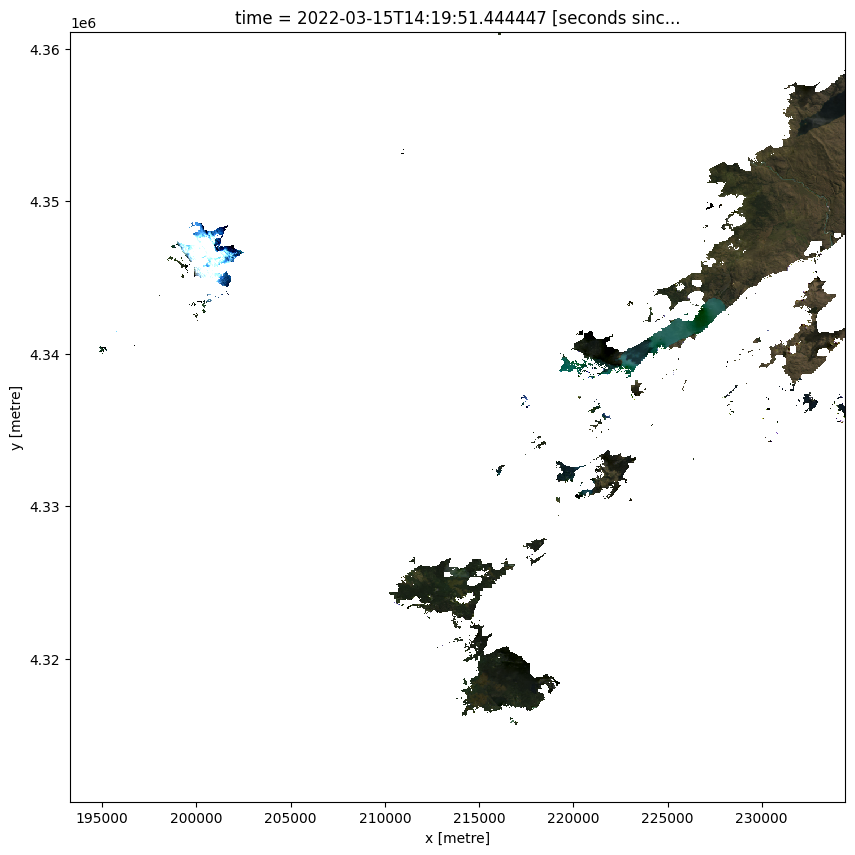

In [58]:
dsf[["red", "green", "blue"]].isel(time=300).to_array().plot.imshow(robust=True, figsize=(10, 10))

In [93]:
valid_pixel_proportion = cloud_free_mask1.sum(dim=("x", "y"))/(cloud_free_mask1.shape[1] * cloud_free_mask1.shape[2])

valid_threshold = 0.8

observations_to_keep = (valid_pixel_proportion >= valid_threshold)
ds_keep = dsf.sel(time=observations_to_keep).persist()
ds_keep

IndexError: Boolean index has wrong length: 369 instead of 719

In [61]:
ds_keep[["red", "green", "blue"]].isel(time=0).time # obtener tiempo ATENCION: aqui habria que ir sacando los time para hacer el filtro

<xarray.DataArray 'time' ()>
array('2015-01-23T14:19:52.192663000', dtype='datetime64[ns]')
Coordinates:
    time         datetime64[ns] 2015-01-23T14:19:52.192663
    spatial_ref  int32 32719
Attributes:
    units:    seconds since 1970-01-01 00:00:00

In [62]:
SELECTED_TIME = np.datetime_as_string(ds_keep[["red", "green", "blue"]].isel(time=0).time.values)
print(SELECTED_TIME)

2015-01-23T14:19:52.192663000


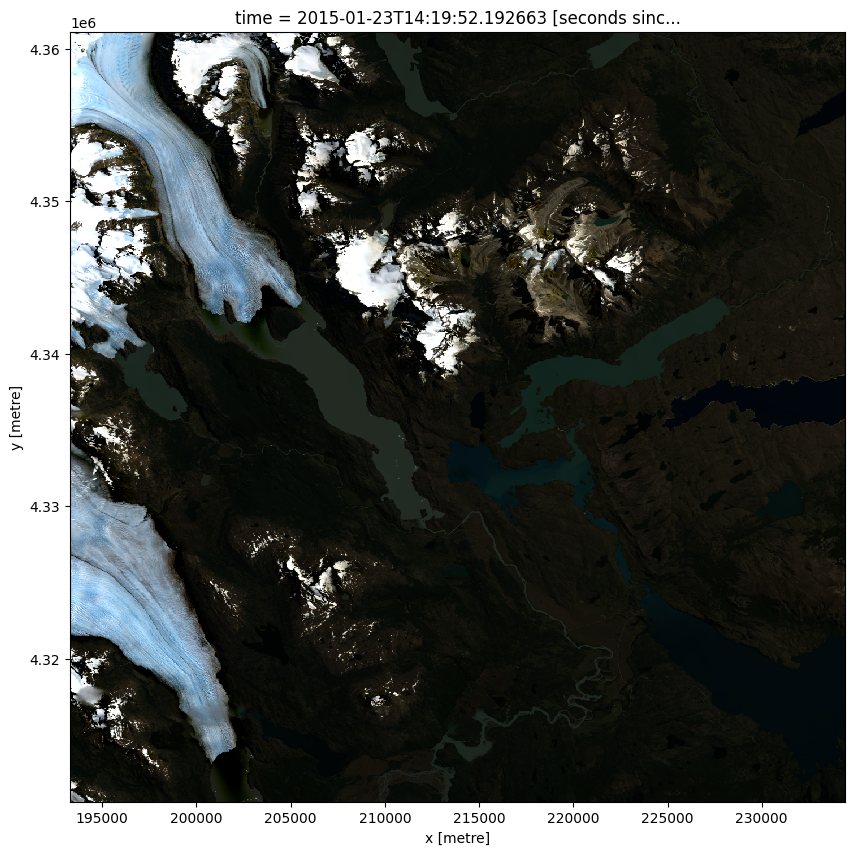

In [63]:
# imagen rgb de sector encontrado con bajo % de nube
ds8[["red", "green", "blue"]].sel(time=SELECTED_TIME).to_array().plot.imshow(robust=True, figsize=(10, 10))

/env/lib/python3.10/site-packages/matplotlib/cm.py:489: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


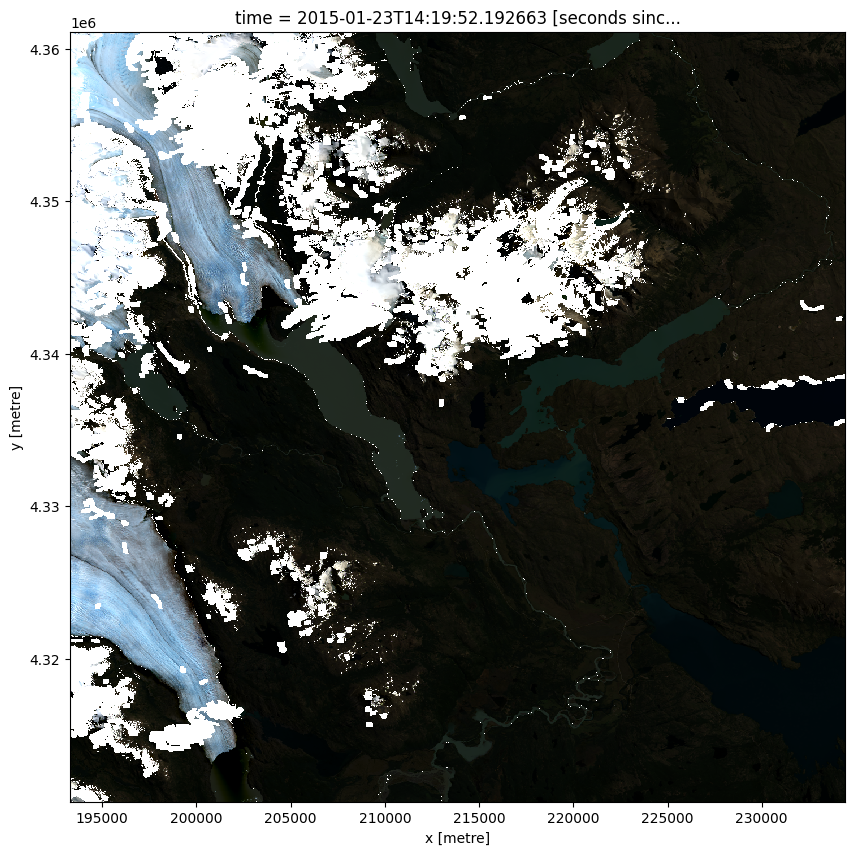

In [64]:
# con la mascara
ds_keep[["red", "green", "blue"]].sel(time=SELECTED_TIME).to_array().plot.imshow(robust=True, figsize=(10, 10))

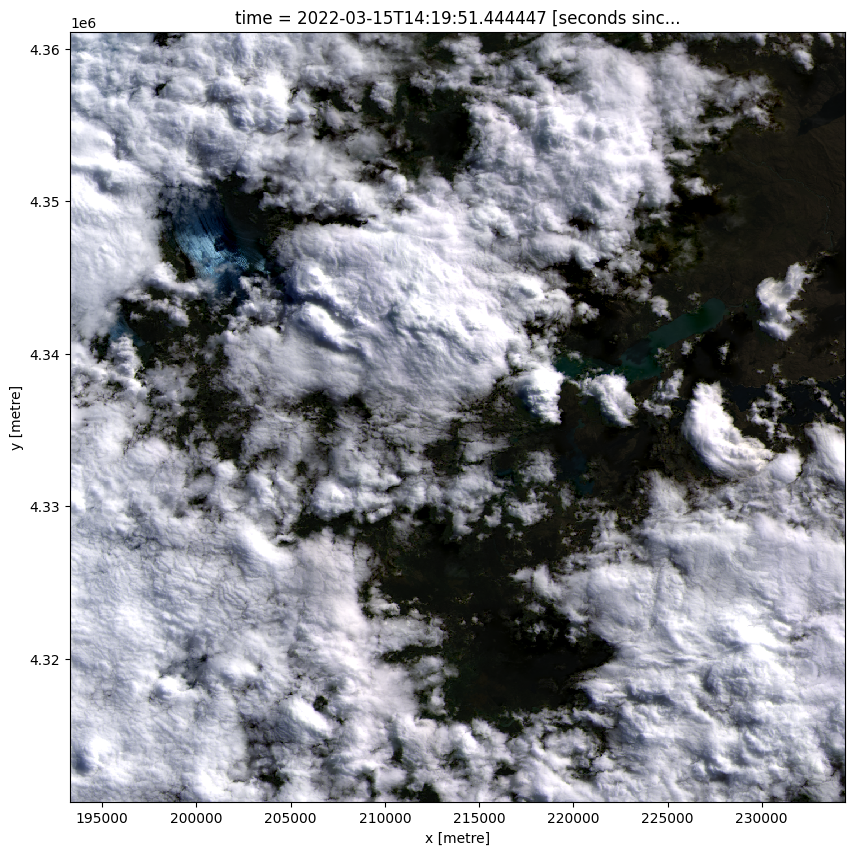

In [65]:
# sector encontrado con alta nube
ds8[["red", "green", "blue"]].isel(time=300).to_array().plot.imshow(robust=True, figsize=(10, 10))


### SRTM

In [112]:
merged_ds = xr.merge([dsf, ds], compat="identical", join="inner")
merged_ds

<xarray.Dataset>
Dimensions:      (time: 0, y: 1684, x: 1371)
Coordinates:
  * time         (time) datetime64[ns] 
  * y            (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x            (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref  int32 32719
Data variables: (12/15)
    coastal      (time, y, x) float32 dask.array<chunksize=(0, 1684, 1371), meta=np.ndarray>
    blue         (time, y, x) float32 dask.array<chunksize=(0, 1684, 1371), meta=np.ndarray>
    green        (time, y, x) float32 dask.array<chunksize=(0, 1684, 1371), meta=np.ndarray>
    red          (time, y, x) float32 dask.array<chunksize=(0, 1684, 1371), meta=np.ndarray>
    nir08        (time, y, x) float32 dask.array<chunksize=(0, 1684, 1371), meta=np.ndarray>
    swir16       (time, y, x) float32 dask.array<chunksize=(0, 1684, 1371), meta=np.ndarray>
    ...           ...
    qa_radsat    (time, y, x) float32 dask.array<chunksize=(0, 1684, 1371), meta=np.ndarray>
    NDVI         (time, y, x) float32 dask.array<chunksize=(0, 1684, 1371), meta=np.ndarray>
    EVI          (time, y, x) float32 dask.array<chunksize=(0, 1684, 1371), meta=np.ndarray>
    NDWI         (time, y, x) float32 dask.array<chunksize=(0, 1684, 1371), meta=np.ndarray>
    NDSI         (time, y, x) float32 dask.array<chunksize=(0, 1684, 1371), meta=np.ndarray>
    elevation    (time, y, x) int16 dask.array<chunksize=(0, 1684, 1371), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

In [119]:
ds = dc.load(**querySRTM)
ds

<xarray.Dataset>
Dimensions:      (time: 1, y: 1684, x: 1371)
Coordinates:
  * time         (time) datetime64[ns] 2014-09-23
  * y            (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x            (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref  int32 32719
Data variables:
    elevation    (time, y, x) int16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

In [114]:
from dea_tools.plotting import display_map, rgb

display_map(x = query['x'], y = query['y'])

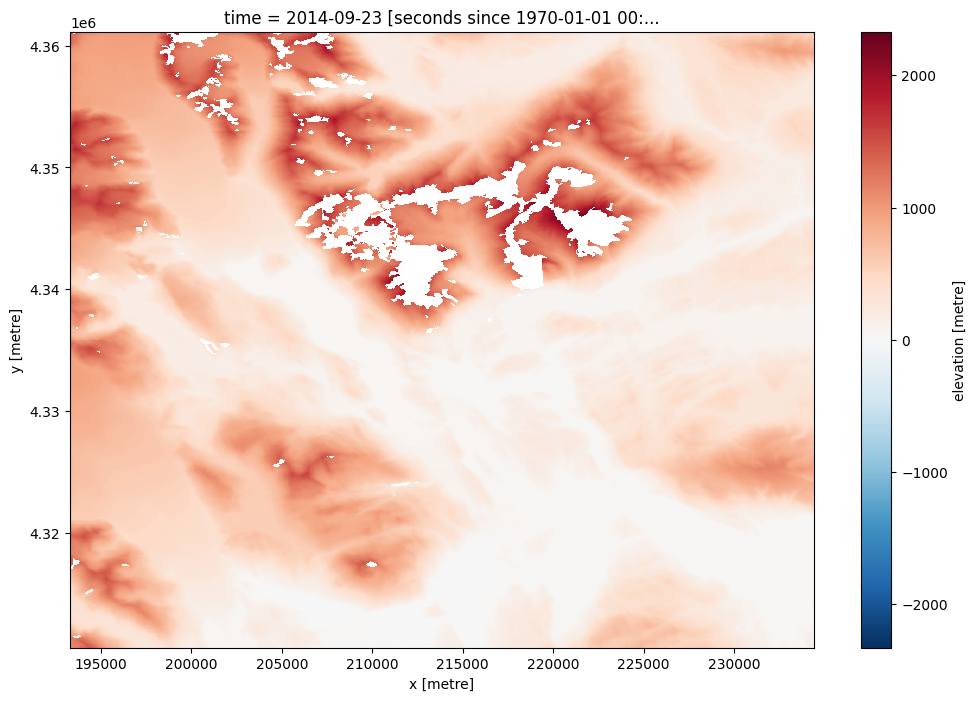

In [115]:
smrt_nan_value = -32768.0
valid_elevation = ds['elevation'].where(ds['elevation'] != smrt_nan_value)
valid_elevation.isel(time=0).plot.imshow(figsize=(12, 8))

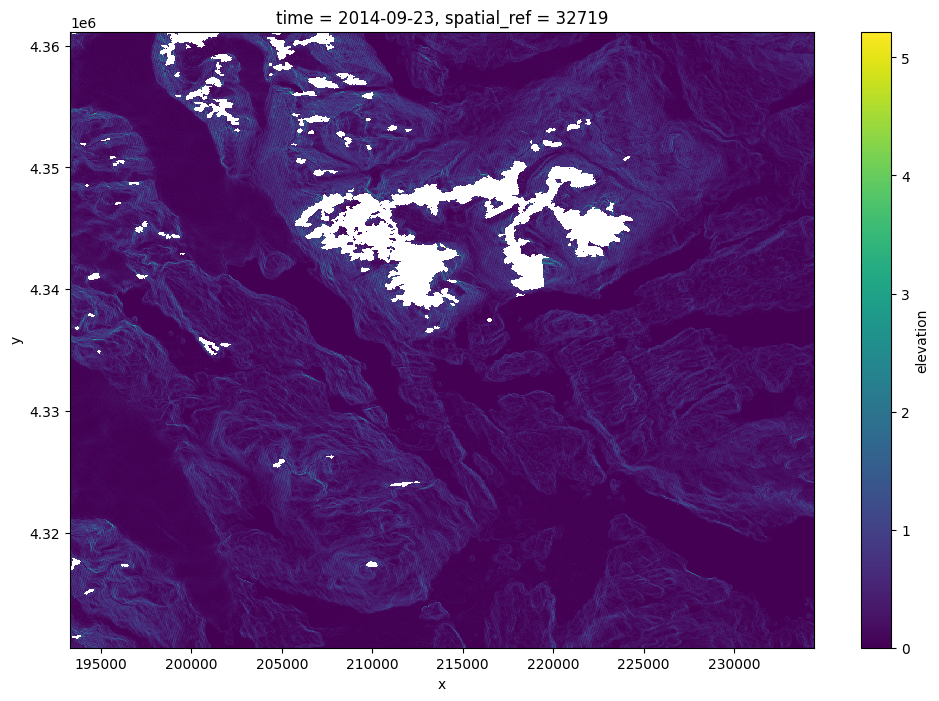

In [116]:
def magnitude(a, b):
    func = lambda x, y: np.sqrt(x**2 + y**2)
    return xr.apply_ufunc(func, a, b, dask='allowed')

a = valid_elevation.isel(time=0).differentiate('x').compute()
b = valid_elevation.isel(time=0).differentiate('y').compute()

# Ploteamos la tasa de cambio
magnitude(a, b).plot.imshow(figsize=(12, 8))

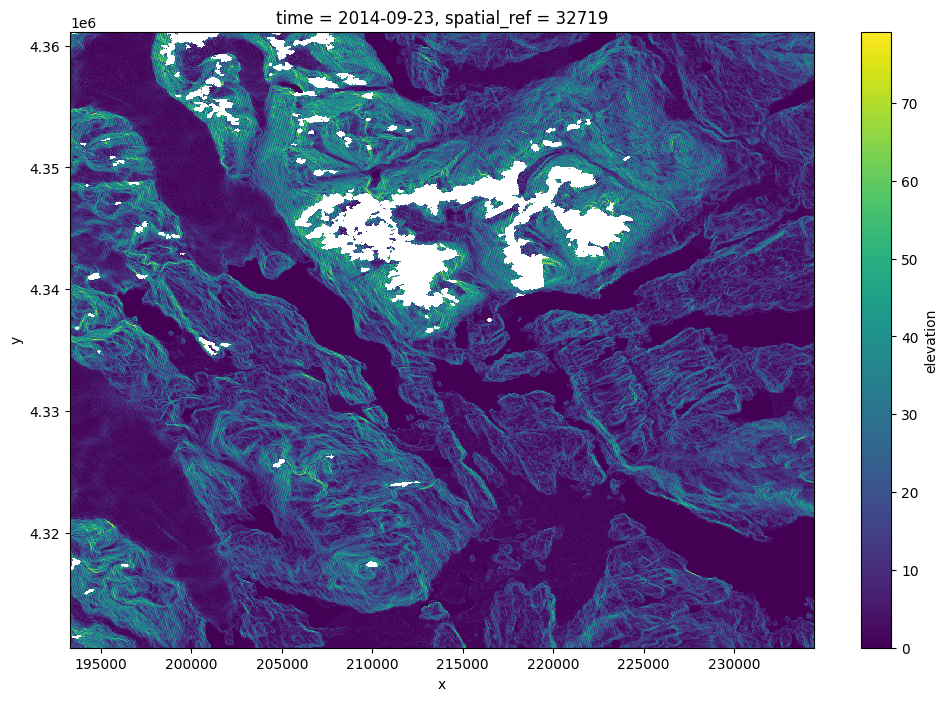

In [117]:
def degree(gradient_magnitude):
    func = lambda m: np.degrees(np.arctan(m))
    return xr.apply_ufunc(func, gradient_magnitude, dask='allowed')

degree(magnitude(a, b)).plot.imshow(figsize=(12, 8))

In [121]:
ds.update({'slope': magnitude(a, b), 'slope_degree': degree(magnitude(a, b))})

<xarray.Dataset>
Dimensions:       (time: 1, y: 1684, x: 1371)
Coordinates:
  * time          (time) datetime64[ns] 2014-09-23
  * y             (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x             (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref   int32 32719
Data variables:
    elevation     (time, y, x) int16 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    slope         (y, x) float32 nan nan nan nan ... 0.3727 0.1213 0.03333
    slope_degree  (y, x) float32 nan nan nan nan nan ... 26.77 20.44 6.918 1.909
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

In [122]:
dsf

<xarray.Dataset>
Dimensions:      (time: 41, y: 1684, x: 1371)
Coordinates:
  * time         (time) datetime64[ns] 2013-03-30T14:18:47.272840 ... 2024-03...
  * y            (y) float64 4.361e+06 4.361e+06 ... 4.311e+06 4.311e+06
  * x            (x) float64 1.933e+05 1.933e+05 ... 2.344e+05 2.344e+05
    spatial_ref  int32 32719
Data variables: (12/14)
    coastal      (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    blue         (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    green        (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    red          (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    nir08        (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    swir16       (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    ...           ...
    qa_aerosol   (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    qa_radsat    (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    NDVI         (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    EVI          (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    NDWI         (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
    NDSI         (time, y, x) float32 dask.array<chunksize=(1, 1684, 1371), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

## Close Cluster and Client

In [ ]:
client.close()

cluster.close()